# Deep learning with fast.ai cookbook - MNIST "hello world" example
Minimal example using the MNIST dataset to demonstrate a minimimal, "hello world" type fast.ai application.

Here are the fastai curated dataset choices for MNIST:

**MNIST_SAMPLE**:  3s and 7s only
~~~
|-- train
|   |-- 3
|   `-- 7
`-- valid
    |-- 3
    `-- 7
~~~

**MNIST_TINY**:  3s and 7s only
~~~
|-- models
|-- test
|-- train
|   |-- 3
|   `-- 7
`-- valid
    |-- 3
    `-- 7
~~~

**MNIST_VAR_SIZE_TINY**:  3s and 7s only
~~~
|-- models
|-- test
|-- train
|   |-- 3
|   `-- 7
`-- valid
    |-- 3
    `-- 7
~~~

**MNIST**: complete dataset
~~~
|-- testing
|   |-- 0
|   |-- 1
|   |-- 2
|   |-- 3
|   |-- 4
|   |-- 5
|   |-- 6
|   |-- 7
|   |-- 8
|   `-- 9
`-- training
    |-- 0
    |-- 1
    |-- 2
    |-- 3
    |-- 4
    |-- 5
    |-- 6
    |-- 7
    |-- 8
    `-- 9
~~~


In [1]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *


     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 36.5 MB/s 
     |████████████████████████████████| 189 kB 47.9 MB/s 
     |████████████████████████████████| 48 kB 4.9 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 561 kB 44.7 MB/s 
     |████████████████████████████████| 51 kB 291 kB/s 
     |████████████████████████████████| 130 kB 46.3 MB/s 


In [2]:
# set up the notebook for fast.ai
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
# In Gradient, datasets get saved in /storage/data when untar_data is called 
# if the dataset has not been copied there already
path = untar_data(URLs.MNIST)

In [4]:
# examine the directory structure of the dataset
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [5]:
%%time
# create an image dataloaders object using the path
# note that because of the directory structure of the dataset 
# the train and valid sets have to be explicitly specified
# details here: https://github.com/fastai/fastai/issues/1129
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')
# create a learner object using the dataloaders that was just defined
# architecture is resnet18; see https://pytorch.org/hub/pytorch_vision_resnet/
# loss function is selected for multi class classification
# accuracy is the metric used to optimize
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
# fit the model for one epoch using 1cycle policy
# see https://docs.fast.ai/callback.schedule.html#Learner.fit_one_cycle
learn.fit_one_cycle(1, 0.1)



epoch,train_loss,valid_loss,accuracy,time
0,0.557135,0.525823,0.990400,02:00


CPU times: user 1min 22s, sys: 3.96 s, total: 1min 26s
Wall time: 2min 19s


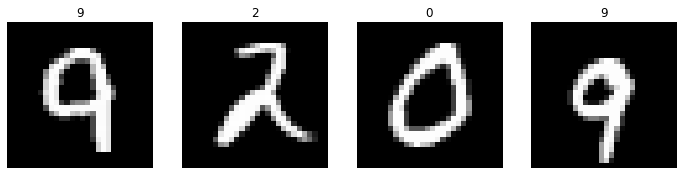

In [6]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


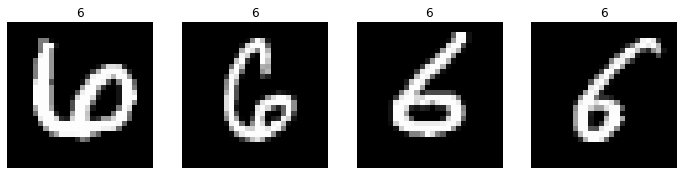

In [7]:
# show a batch of validation data
dls.valid.show_batch(max_n=4, nrows=1)

In [8]:
# take a look at one of the test images
img_files = get_image_files(path/"testing")
img = PILImage.create(img_files[7000])
img


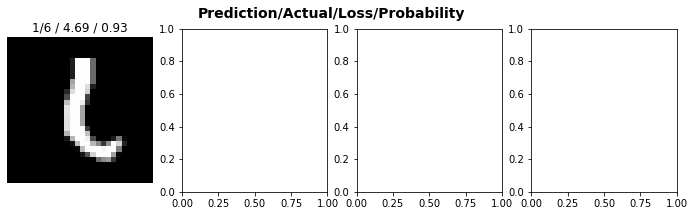

In [9]:
# show the images with the highest loss
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, nrows=1)


In [10]:
# examine the model, including its layers
learn.summary()

Sequential (Input shape: 64 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 14 x 14   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 7 x 7     
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                        

In [11]:
# select an image from the test set
img = PILImage.create(img_files[0])
img

In [12]:
# apply the trained model to the image
learn.predict(img)

('6',
 TensorBase(6),
 TensorBase([0.0107, 0.0093, 0.0098, 0.0088, 0.0116, 0.0074, 0.9145, 0.0091, 0.0094, 0.0094]))

In [13]:
# select a different test set image and apply the model to it to get a prediction
img = PILImage.create(img_files[2030])
img

In [14]:
learn.predict(img)

('0',
 TensorBase(0),
 TensorBase([0.9077, 0.0100, 0.0113, 0.0104, 0.0109, 0.0092, 0.0092, 0.0092, 0.0086, 0.0134]))

In [15]:
# select a different image and apply the model to it to get a prediction
img = PILImage.create(img_files[5800])
img

In [16]:
learn.predict(img)

('5',
 TensorBase(5),
 TensorBase([0.0094, 0.0095, 0.0090, 0.0089, 0.0097, 0.9215, 0.0103, 0.0082, 0.0063, 0.0071]))